# Langchain Post and Copywriting Agent
This Agent takes a transcript from a video and creates a Blog Post and a linkedin post from it

In [1]:
import os, getpass

def _set_env(var:str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}:")
_set_env("ANTHROPIC_API_KEY")
if not os.environ.get("TAVILY_API_KEY"):
    os.environ["TAVILY_API_KEY"] = getpass.getpass("Tavily API key:\n")

ANTHROPIC_API_KEY: ········
Tavily API key:
 ········


In [9]:
# instantiate LLM 
import base64
import anthropic
import httpx
from langchain_anthropic import ChatAnthropic

#define model name we use
model ="claude-3-7-sonnet-latest"

In [10]:
llm = ChatAnthropic(model=model)

In [11]:
transcript = """

 Hallo zusammen zu einem neuen Video über KI und Agentensysteme.
 Mein Name ist André und ich baue individuelle KI Lösungen.
 In dem heutigen Video möchte ich etwas zeigen,
 wie man von seinen YouTube Videos oder sonstigen Aufnahmen,
 die man so macht,
 anderen Content generieren kann,
 am besten vollautomatisch für die verschiedenen anderen Plattformen,
 beispielsweise LinkedIn oder Blogposts.
 Und das eben alles mit Hilfe von einem einzigen Content,
 den man kreiert hat.
 Ich nenne hier,
 wie man sehen kann,
 aus eins machen.
 Das heißt,
 wir haben im Endeffekt keine Grenzen,
 was es an Output geben kann und auch genannt der AI Multiplikator.
 das ganze mal ein bisschen greifen und abzustecken,
 habe ich ein kleines Schaubild gemacht.
 Lass uns einfach mal kurz in die Grafik reingucken.
 Also im Endeffekt geht das ganze los mit einem eigenen Video,
 beispielsweise ein YouTube Video oder einfach nur eine Aufnahme von,
 keine Ahnung,
 Teller,
 OBS,
 Loom,
 was auch immer.
 Also irgendein Video Rack Tool,
 was am besten schon ein automatisches Transkript der eingesprochene Sprache macht,
 so wie bei diesem Video jetzt gerade.
 Das heißt im Endeffekt Transkript,
 was bedeutet das?
 Ja,
 man kann auch sagen eigentlich die Untertitel.
 Und bei den Untertiteln ist es eben sehr charmant,
 weil die Untertitel natürlich ein hervorragender Input auch sind für ein large language Model oder für ein Language Model insgesamt,
 sodass man wunderbare Zusammenfassungen machen kann,
 stilistisch die nochmal abändern kann und so weiter und so fort,
 aber im Prinzip das gesamte Thema erfasst wird.
 Genau,
 das heißt,
 dieser Teil ist hier in diesem gelben Kasten,
 der ist nicht Teil dieses Videos,
 nicht Teil des Agentensystems,
 was ich heute zeige,
 aber im Endeffekt gibt es das eben auch schon sehr gut out of the box von verschiedenen Anbietern.
 Der Hintergrund war tatsächlich einfach der zu ich bin Unternehmer,
 ich bin vielleicht Freelancer oder sonst irgendwie selbstständig und habe wenig Zeit,
 viel Content zu generieren.
 Und im Endeffekt möchte ich Videos machen,
 weil Videos eben auch wichtig sind,
 auch eine persönliche Note geben und auch möchte,
 dass der Content schon von mir selbst kommt bzw.
 Eben auch das ist,
 was ich wirklich vermitteln möchte,
 nicht irgendwas aus der Dose,
 sage ich mal,
 aber im Endeffekt einfach sauber nochmal für die jeweilige Plattform nochmal sauber aufbereitet.
 Genau,
 dann geht es im Prinzip los.
 Also wie gesagt,
 Videotranskript ist quasi die Quelle des Wissens dann in dem Fall.
 Und dem ganzen eben,
 wie gesagt,
 einen Agenten Touch zu verleihen und es ein bisschen lebendiger zu machen und ein bisschen smarter,
 habe ich mir überlegt,
 okay,
 was könnte man dann eigentlich machen,
 anstatt jetzt einfach nur copy und paste,
 blöd gesagt,
 das Transkript zu nehmen und das gegen ein LLM zu jagen.
 Also was wir jetzt hier machen,
 ist im Endeffekt im ersten Schritt,
 dass wir erstmal eine Suche machen und zwar nach LinkedIn Best Practices 2025.
 Das heißt,
 wir durchsuchen das Internet erstmal nach Informationen,
 die uns mitteilen,
 okay,
 das und das sollte man 2025 berücksichtigen,
 wenn man geschriebene Beiträge bei LinkedIn veröffentlicht.
 Danach machen wir eine Analyse der Transkriptsprache.
 Das heißt,
 in dem Fall habe ich gesagt,
 für mich persönlich,
 ich finde es sinnvoll,
 dass ich deutsche Videos,
 z.B.
 deutschsprachige Videos aufnehme und die im Endeffekt dann auch in einen deutschsprachigen LinkedIn Artikel umgeschrieben werden sollen,
 beziehungsweise zusammengefasst werden sollen.
 Natürlich könnte man auch sagen,
 ich möchte das in Französisch oder Spanisch oder in allen drei Sprachen haben,
 wie man möchte.
 Ich habe mich jetzt ja bewusst dafür entschieden,
 gerade wenn man nämlich auch amerikanischsprachige Modelle nimmt,
 dann hat man häufig erstmal den Output,
 den Standard Output.
 Ging mir hier genauso,
 ich habe den deutschen Input reingegeben und habe trotzdem eine englischsprachige LinkedIn Posts bekommen.
 Das heißt,
 ich habe hier nochmal eine explizite Abfrage nochmal nach der Transkriptsprache.
 Das heißt,
 es wird analysiert und dann wird die Sprache automatisch gesetzt.
 Dann wird der LinkedIn Artikel,
 in dem Fall eben LinkedIn Artikel,
 geschrieben in der Sprache des Videos und unter Berücksichtigung dieser Best practices.
 Und wenn das ganze fertig ist,
 kommt noch eine schöne Agentenfunktion dahin,
 nämlich,
 weil wir wollen doch mal gucken,
 ob auch der geschriebene Artikel tatsächlich diesem Standard entspricht.
 Die Aufgabe ist jetzt natürlich relativ trivial hier,
 soll auch aber mal an einem einfachen Beispiel darstellen,
 wie so eine Agentenfunktion interagiert oder wie die Agentenfunktionen untereinander interagieren und miteinander sich sozusagen dann verbessern.
 Und was wir dann eben hier machen,
 wir vergleichen den geschriebenen Artikel nochmal mit den Best Practices,
 die vorher rausgesucht worden sind und benoten ihn.
 Wir haben uns das hier einfach gemacht,
 es gibt eine Benotung zwischen null und erste.
 Null heiß,
 entspricht nicht dem Standard und eins bedeutet,
 kann so rausgehen.
 Und wenn das Ganze erledigt ist,
 dann wird im Endeffekt der LinkedIn Post komplett generiert.
 Man kann ihn dann in eine Datenbank schreiben,
 man kann natürlich auch die LinkedIn API anschließen und das automatisch dann publizieren,
 nachdem man das Video gemacht hat und so weiter und so fort.
 Genau so weit gehen wir aber heute in dem Fall hier nicht.
 So,
 dann würde ich vorschlagen,
 gehen wir mal in den Code direkt rein.
 Und da sind wir schon.
 Ich habe das ganze mit LangChain gebaut,
 habe es hier Post und Copywriting Agent mal genannt,
 weil es im Endeffekt ja so ein bisschen in die Richtung geht.
 Und ja,
 was machen wir hier eigentlich?
 Also wir haben
 eine Antropic angeboten.
 In dem Fall habe ich es mit einem nicht lokalen Modell gemacht,
 was ich eigentlich ja sonst immer sehr gerne mache,
 aber in diesem Fall habe ich mal einen anderen Weg gewählt und mit dem Cloud 3.
 Jul.
 Das direkt probiert.
 Genau,
 wir haben dann hier noch eine kleine Testsequenz,
 zu gucken,
 ob die Anbindung des LLMs funktioniert,
 ob im Endeffekt der API Key und so weiter passt.
 Genau,
 das heißt,
 hier haben wir noch ein bisschen was zum Testen gehabt und zum Rumspielen.
 So,
 und dann kommen wir eigentlich auch schon zu dem spannenden Teil,
 nämlich zu der Langgraph Implementierung.
 Das heißt,
 wir starten hier mit einem State und der ist vom Typ typedict.
 Und das heißt,
 wir haben hier im Endeffekt
 ein Wörterbuch und setzen hier drei verschiedene Variablen.
 Also wir haben hier einmal den Typ Transcript,
 haben wir frei genannt,
 das ist,
 dann haben wir den LinkedIn Post an sich und dann haben wir noch einen Blogpost.
 So,
 und da sind wir auch schon mit dem Code.
 Also wir benutzen in diesem Fall eine LangChain mit Antropic sieben und dreiig,
 dem latest Stand.
 Und als Internetsuche,
 wie ich sie eben schon gezeigt habe,
 haben wir eine Tavilysearch.
 Tavili ist
 eine Internetsuche,
 eine Suchmaschine,
 die eben dafür optimiert ist,
 mit Large language Models und vor allem auch mit Agenten zusammenzuarbeiten.
 Und dementsprechend kann man das eben sehr gut miteinander hier verbinden.
 Wir haben so ein Parameter,
 kann man hier setzen,
 wie viele Resultate möchte ich bekommen,
 was für ein Thema hat man?
 Hier sollen ja Antworten mit inkludiert werden,
 ins ausspielen und so weiter und so fort.
 Bin hier mit einem relativ default Setting reingegangen.
 Das einzige,
 was ich noch verändert hatte,
 war im Prinzip,
 ich hab das include answer auf true gesetzt,
 genau,
 weil ich eben eine klare Antwort noch haben wollte,
 die dann weiter zu bearbeiten.
 Dann bauen wir eigentlich auch schon den State,
 und zwar also für unser Lang Graph.
 Das heißt,
 wir haben einmal ein Transcript genannt,
 was ein String sein wird,
 ein LinkedIn Post,
 den am Ende das Ergebnis sein wird als String.
 Blogposts habe ich mal in dem Beispiel noch mal rausgenommen,
 wieder Best Practices Node.
 Das heißt,
 hier wird im Prinzip diese Zusammenfassung oder unsere Notiz reingeschrieben,
 die wir zu diesen best practices finden,
 auch einmal als String und dann haben wir noch ein LinkedIn post quality,
 also diese Bewertung in Form eines Integers,
 also einer Zahl,
 und die in dem Fall der null oder eins sein wird.
 Und wie vorhin schon gesagt,
 haben wir noch ein Thema Language,
 das heißt hier speichern wir noch,
 welche Sprache rauskommt.
 Den State kann man sich für die Leute,
 die es vielleicht noch nicht so gut kennen,
 kann man sich so vorstellen,
 das ist eben sehr,
 sehr charmant daran,
 im Prinzip wie eine vielleicht globale Variable.
 Also wir können hier im Endeffekt,
 während wir durch die verschiedenen Schritte gehen,
 können wir hier den Status abspeichern und die Ergebnisse zwischenspeichern,
 später wieder darauf zuzugreifen.
 Das kann man jetzt wunderbar in den Nodes sehen.
 Die sogenannten Nodes sind eigentlich die Funktionen,
 die man aufrufen möchte.
 Unsere erste Funktion,
 also wie sie jetzt hier in der Reihenfolge sind,
 tatsächlich nicht wichtig,
 die Reihenfolge kommt später dann,
 wenn wir den Graph bauen,
 da ist sie dann relevant.
 Hier kann man sie im Prinzip einfach unterschreiben,
 wie sie einem einfallen,
 wie man sie gerade machen möchte.
 Also wir fangen jetzt hier an mit der ersten Funktion,
 da werden wir die LinkedIn Posts einfach generieren.
 Das heißt wir schreiben hier eine kleine Einführung rein.
 Create a LinkedIn post with emojis and matching hashtags.
 Das ist eigentlich immer so sehr generalistisch gesagt,
 also einfach erstmal so eine Erklärung,
 eine Dokumentation im Prinzip.
 Dann haben wir hier die Antwort,
 die vom Large language Model kommt.
 Wir erinnern uns,
 wir haben vorher das Anthropic Cloud 3.
 Jul.
 Instanziert und hier schreiben wir jetzt create a LinkedIn post,
 also den prompt im Prinzip,
 create a LinkedIn post in und jetzt,
 Achtung,
 kommt state Language.
 Also wir greifen jetzt hier auf die Variable zu,
 die aus diesem state dann kommt,
 with emojis and matching hashtags about state.
 Achtung,
 nächster Punkt,
 transcript,
 also das ist das,
 was wir dann aus unserem Video schon herausbekommen haben.
 T take also into consideration what you found out in.
 Und jetzt kommt wieder die nächste state Variable,
 best practices node,
 also das ist das,
 was wir hier dann uns notiert haben und gebe am Ende eine Antwort,
 nämlich den LinkedIn Post an sich,
 den wir haben möchten.
 Also das ist eigentlich unsere,
 sag jetzt mal,
 Hauptfunktion,
 also das,
 worauf wir eigentlich hier hinarbeiten.
 Ja,
 dann haben wir eine kleine Funktion,
 die die Language definiert,
 das heißt auch hier wieder parameter State,
 wieder eine kleine Einführung.
 Und dann geht es im Prinzip wieder mit einem relativ simplen prompt read part of the wider state transcript,
 also wir lesen die Quellinformation,
 to choose correct target language for the text only,
 give back the language as word for example German given German.
 Hier lassen wir dann nur wirklich als value of the key language eben German,
 French,
 Spanish,
 was auch immer wiedergeben,
 damit wir in der weiteren Verarbeitung keine Probleme haben.
 Das ist sowieso sehr wichtig bei prompt engineering und bei Agent Systemen,
 dass man die verschiedenen Outputs sehr stark einschränkt,
 zumindest meine Erfahrung.
 Das heißt,
 wenn ihr einen Agent baut und eben verschiedene Abzweigungen machen müsst,
 dann ist es wichtig,
 dass man hier eben den Output,
 den man bekommt,
 sehr,
 sehr stark kontrolliert,
 sodass man die weiteren Verzweigungen gut kontrollieren kann.
 Hier könnte es natürlich jetzt passieren,
 wenn ich jetzt nicht explizit sagen würde,
 gib mir jetzt nur die Sprache zurück,
 dann könnte es sein,
 ja,
 dass wieder ein ganzer Satz kommt oder vielleicht mehrere Sätze sogar,
 aber das dann irgendwie vom Large language Model zurückkommt,
 das geschriebene Transkript ist in der Sprache Deutsch geschrieben oder sowas,
 und das ist natürlich viel zu viel Information,
 die wollen wir gar nicht haben,
 wir wollen ja einfach nur wissen,
 welche Language das ist,
 weil wir hier oben sagen,
 create a LinkedIn post in state language,
 also in German könnte man dann sagen,
 oder in Englisch with emojis und nicht in the text is written in Englisch,
 blablabla,
 with emojis and so,
 das ist ja totaler Quatsch,
 also deswegen muss man da mal drauf achten.
 Für die meisten wahrscheinlich recht klar,
 aber ich sag's lieber nochmal.
 Dann Search online for best practices,
 das ist im Endeffekt unsere allererste Funktion,
 also man könnte das jetzt hier noch mal ein bisschen chronologischer sortieren,
 aber wie gesagt,
 das kommt dann später.
 Ich habe es hier so mal runtergeschrieben,
 wie ich es mir im Prinzip bottom up überlegt habe.
 Also ich habe ja,
 ich möchte eigentlich einen LinkedIn Post machen,
 dann habe ich gut,
 ich möchte eigentlich noch gucken,
 welche Sprache der dann sein müsste,
 und dann ist mir eigentlich möchte ich den auch noch ein bisschen verbessern über sogenannte best practices,
 dann ist mir eingefallen,
 eigentlich müssen die Best practices doch nach vorne,
 weil es macht ja keinen Sinn,
 den erst zu schreiben,
 den dann nochmal zu verbessern,
 es kostet ja auch alles am Ende des Tages Ressourcen,
 welche auch immer,
 aber entweder Geld oder eben die eigene Rechenleistungen und sollte man natürlich im Hinterkopf behalten,
 das dann eben ein bisschen sinnvoll aufzubauen von der reinen Abfolge her.
 Genau,
 dann geht es weiter mit der Search online,
 also wir benutzen dann diese TavelySearch,
 das heißt,
 deswegen haben wir hier auch im Endeffekt jetzt nicht mehr LLM,
 sondern Tool,
 weil wir jetzt das Tavili als Tool instanziert haben,
 wie wir vorhin gesehen haben.
 Und hier habe ich jetzt im Prinzip einen sehr einfachen Prompt auch wieder gemacht,
 wo ich look for twenty twenty five LinkedIn best practices for written posts and save them in a note.
 Also das ist im Endeffekt eigentlich auch sehr kristallklar und wir sagen,
 okay,
 ich möchte das haben.
 Hier gibt es einen kleinen Unterschied,
 wir haben ja dieses include answer true hier vorhin gesehen und wie ihr sehen könnt,
 ist das hier ein bisschen anders.
 Das heißt,
 wir kommen hier nicht über eine Punkt Annotation an den Content ran,
 sondern müssen hier im Prinzip,
 weil Tavili ein anderes Ausgabeformat hat,
 hier nochmal ein bisschen umbauen.
 Da muss man auf jeden Fall darauf achten,
 wenn man verschiedene Tools benutzt in einem Agent System,
 dass man eben den Output auch teilweise unterschiedlich handeln muss.
 So,
 und dann haben wir noch eine Check LinkedIn Post Quality,
 das ist der Grader,
 den wir vorhin gezeigt haben mit null und Erste.
 Das heißt,
 hier sage ich im Endeffekt einfach compare the created LinkedIn post from state LinkedIn post.
 Also wir holen uns den jetzt einmal halt ab,
 weil wir haben den ja schon dann einmal abgerufen und with a research best practices and give a grade which is zero one,
 give one if it's very good match only reply to grade without explanation.
 Genau.
 So,
 das heißt im Endeffekt,
 was wir jetzt hier tun können,
 ist,
 wir können einen,
 eine null oder eins generieren lassen,
 je nachdem wie gut das ist.
 So,
 dann bauen wir alles mal zusammen.
 Und zwar haben wir dann hier den,
 bauen wir erstmal den Workflow,
 das ist eben für den Lang Graph notwendig,
 machen wir einen sogenannten state Graph,
 Typ State und sagen Workflow add node und dann fangen wir an mit dem LinkedIn Post,
 mit der LinkedIn Post Methode.
 Das heißt,
 von der Syntax ist das im Prinzip immer so,
 dass man den Funktionsnamen hier vorne einmal reinschreibt in Anführungsstrichen und danach nochmal eben als die Methode an sich.
 Das heißt,
 ich adde jetzt erstmal alle meine Funktionen hierzu,
 die ich brauche.
 Wichtig,
 ich adde jetzt hier oben nicht bei den Nodes meinen,
 meinen Grader,
 also der die Qualität des Beitrags checkt,
 das mache ich jetzt nicht an der Stelle,
 sondern der gehört hier einfach auch nicht rein bei den Nodes,
 weil das ist ja im Endeffekt später dann einfach nur ein Entscheidungsweg.
 Und dann geht es im Prinzip los.
 Wir können hier nochmal einen kleinen Kommentar vielleicht
 addges oder add edge,
 doch add edges ist wahrscheinlich besser,
 wenn es im Plural hier ist.
 Genau.
 Das heißt,
 wir nehmen wieder den Workflow,
 also wir haben erst die Knoten hinzugefügt,
 die Knoten sind wie gesagt die Funktionen und dann sagen wir workflow add edge und dann müssen wir ganz wichtig hier einen Start setzen.
 Hier geht es los,
 damit der Graf auch im Prinzip weiß,
 wo es losgeht oder der Agent.
 Und wir fangen an mit Search online for Best Practices,
 weil als allererstes möchte ich erstmal wissen,
 okay,
 was sind die Best Practices,
 die ich benötige,
 gute LinkedIn Posts zu schreiben.
 Wie gesagt,
 es macht keinen Sinn,
 erst den LinkedIn Post zu schreiben,
 dann zu suchen,
 dann zu merken,
 eigentlich war es ja Mumpitz,
 dann den wieder zu korrigieren und so weiter.
 Wir versuchen den Agent trotz aller Praktikabilität sehr schlank zu halten.
 Dann Workflow,
 Search online for best practices,
 Define Language,
 also wir bauen den Edge jetzt,
 also wir bauen jetzt im Prinzip den Graph so weiter,
 dass wir jetzt hier wieder die alte,
 also die vorhergehende Methode einmal übergeben als Parameter und dann die nächste,
 die danach folgt.
 Wenn man das jetzt ändern würde,
 dann können wir gucken,
 was denn passiert,
 wenn ich den rausnehme.
 So,
 das heißt wir machen hier als nächstes kommt define language,
 also wir wollen dann rausfinden,
 welche Sprache brauchen wir eigentlich
 und dann geht es hier wieder weiter,
 wir übergeben wieder die define language und dann sagen wir generate LinkedIn post,
 das heißt nachdem wir quasi unsere Hausaufgaben gemacht haben,
 wird der Post generiert.
 Dann kommt der Entscheidungsweg und zwar mit einem conditional Edge,
 das heißt hier sagen wir,
 nehmen wir wieder den zuletzt gegebenen LinkedIn Post,
 also generate LinkedIn Post Methode wieder als ersten Parameter und dann sagen wir check LinkedIn post quality,
 das heißt hier übergeben wir jetzt direkt die Methode,
 die wir benutzen möchten.
 Als Ergebnisse haben wir dann hier entweder eine Eins,
 das heißt wir sind fertig,
 also sind zufrieden damit,
 haben wir so definiert,
 oder wir sind nicht zufrieden,
 dann sagen wir,
 na dann generiere es halt nochmal.
 Da wir aber in dem Fall ehrlicherweise schon vorher ja die Best practices reingeben,
 haben wir eine sehr gute Chance,
 dass man hier mit einer eins rauskommt,
 aber nichtsdestotrotz,
 es gibt vielleicht auch mal ein bisschen schwierigere Aufgabenstellung,
 will ich es mal nennen,
 und dann hat man hier trotzdem noch mal so einen Überprüfungsloop drin.
 Am Ende hat man dann noch ein Workflow add edge,
 also dann haben wir im Endeffekt hier den,
 also wenn wir hier rüberkommen,
 dann wird noch mal was generiert und dann kommen wir zum Ende,
 also müssen auch immer Bescheid geben,
 wann der Agent zu Ende ist oder fertig ist,
 fertig sein soll.
 Das ganze bauen wir am Ende,
 kompilieren wir das in eine sogenannte Chain.
 Also wie gesagt,
 wir arbeiten hier mit LangChain und Lang Graph und nehmen diesen Workflow,
 kompilieren ihn und was sehr sehr cool ist,
 dass man eben bei LangChain und bei Langgraph diese Graphen eben,
 bevor man überhaupt irgendwas macht,
 also wenn ich das jetzt hier ausführe,
 passiert noch überhaupt gar nichts.
 Also es wird noch gar nicht mit irgendeinem externen Tool,
 Large language model oder wie auch immer gesprochen,
 hier passiert einfach noch nichts.
 Wir bauen einfach nur im Hintergrund diesen State Graph auf,
 das ist alles.
 Und zu gucken,
 ob der passt,
 kann man hier wunderbar nämlich dann sehen,
 wie die zusammenhängen und auch wo die Conditionals sind,
 das heißt diese soliden Pfeile,
 die OK,
 start Search online,
 Define Language,
 generate LinkedIn Post.
 Aber hier sieht man z.b.
 dass wenn der Generate LinkedIn Post eine Null ausspielt,
 also das ist hier diese gepunktete Linie,
 ist nämlich,
 dass wir eine Bedingung erfüllen müssen.
 Wenn die null ist,
 dann macht er das nochmal und wenn die wieder null ist,
 dann macht er das wieder nochmal und wenn es eine eins ist,
 dann sind wir fertig.
 Genau.
 Das heißt,
 im Endeffekt ist das eine wunderbare Methode,
 dann hier schon mal zu gucken,
 ob der Graph an sich erstmal Sinn macht.
 Wenn man hier verschiedene Sachen rausnimmt,
 dann sieht man nämlich auch,
 dass die sich teilweise dann splitten und eben nicht mehr zusammenarbeiten oder also zwei getrennte Systeme dann sozusagen sind,
 was wir eigentlich nicht wollen.
 Das heißt,
 hier bekommt man einen sehr,
 sehr guten Übergriff und kann das Ganze wunderbar erstmal modellieren und kann auch gucken,
 hey,
 passt das so ungefähr mit dem zusammen,
 was ich mir vielleicht vorher skizziert habe.
 Auch da der Tipp von ich würde immer mal vorher auf dem Blatt Papier,
 auf dem iPad,
 wo auch immer,
 mir das ganze Ding mal aufmalen und überlegen,
 was möchte ich eigentlich erreichen und wie sollen sozusagen die Checks and Balances sein,
 damit wir überhaupt zu unserem Ziel kommen.
 Und das kann man dann hier am Ende mit diesem Bild wunderbar abgleichen.
 Genau,
 wenn das Ganze dann fertig ist,
 dann kommt die eigentliche Ausführung von dem Ganzen.
 Das heißt,
 wir haben hier einen State,
 also wir nennen es einfach State,
 dann haben wir die Chain,
 die wir hier oben gebaut haben aus dem Workflow und dann kommt wieder ein Invoke.
 Das Invoke haben wir hier oben schon ein paar mal gesehen,
 nämlich hier,
 das ist im Prinzip immer die Interaktion dann mit dem Modell und übergeben hier als Transkript unser Transkript,
 das wir vorher weiter als Variable einfach definiert haben.
 Können auch mal kurz dahin springen,
 uns nochmal zu erinnern.
 Und zwar hier ist es Transkript,
 hier ist noch Zeug von anderen Tests,
 aber im Endeffekt,
 das ist hier unser Transkript gewesen.
 So,
 und dann geht es weiter.
 Dann kommt erstmal der Best Practice Teil.
 Ich habe den hier extra mal printen lassen,
 damit man das ein bisschen sieht,
 was hier eigentlich passiert.
 Das heißt,
 auch das hilft immer sehr.
 Man kann natürlich noch verschiedene Tracing Tools benutzen und so weiter.
 Bei so einem kleinen und einfachen Agent reichen meiner Meinung nach auch ganz normale Print Statements,
 das ein bisschen zu debuggen und zu sehen,
 wo wir eigentlich rauskommen.
 Das heißt,
 wir haben hier im Endeffekt ein print Statement,
 wo wir sagen,
 okay,
 was ist die Language?
 Wir haben ein Print Statement,
 was die Antwort ist und wir haben ein Print Statement,
 was uns die Bewertung gibt.
 So,
 das sieht dann folgendermaßen aus im Endeffekt,
 hier ist der Best Practice Eintrag.
 Ich habe es auch nicht weiter sonst mit irgendwelchen Texten davor kommentiert.
 Ich habe einfach das stumpf rausprinten lassen,
 wie ihr gesehen habt.
 Das heißt,
 das ist im Endeffekt unser,
 unsere Notiz,
 die wir berücksichtigen müssen,
 unser Benchmark so gesehen.
 Sprache ist German,
 ja genau.
 Und wir haben die Bewertung eins bekommen.
 Das heißt,
 wenn wir hier raufgucken,
 zack,
 es geht zum Ende hin,
 super.
 Genau,
 und dann werden wir am Ende das Ganze nochmal ausdrucken.
 Das geht dann eben sehr charmant wieder über den State und den,
 ich nenne es wieder globale Variable,
 LinkedIn Post.
 Und wir bekommen hier lustigerweise dann wieder eine englische Einleitung.
 Wie gesagt,
 also Standardantwort ist ja dann irgendwie immer englisch,
 weil ich habe natürlich auch alles andere auf englisch gepromptet und so weiter und so fort.
 Aber explizit natürlich den Content möchte ich eben auf Deutsch haben in dem Fall.
 Genau,
 ein paar lustige Emojis,
 wie ich es auch gerne haben wollte.
 Genau,
 große Ideen brauchen klare Strukturen.
 Jeden Tag treffe ich Visionäre mit brillanten Apple Ideen.
 Aber wisst ihr,
 was der häufige Stolperstein ist?
 Der Start ohne klaren Plan und so weiter und so fort.
 Das hier sind Sachen aus einem anderen Video,
 das ich gemacht habe.
 Und hier sind noch die passenden Hashtags dazu.
 Genau,
 am Ende gibt es nochmal ein kleines Resümee.
 Dieser Post erfolgt den LinkedIn Best Practices 2025.
 Authentischer Storytelling Ansatz,
 klarer Mehrwert,
 professionelle Emojis,
 relevante Hashtags und Call to action.
 Genau.
 Gut,
 ich hoffe,
 ihr habt ein bisschen was gelernt zum Thema Agent Systeme und wie ihr vielleicht euren Marketingflow verbessern könnt,
 insbesondere wenn ihr ein kleines Unternehmen seid,
 selbstständig seid,
 Freiberufler,
 wie auch immer und euch eigentlich die Zeit fehlt,
 die verschiedenen Kanäle zu bespaßen.
 Auf der anderen Seite wollte ich natürlich mal einen Einblick geben,
 wie Agents eigentlich so funktionieren,
 wenn man sie programmiert.
 Es gibt natürlich mittlerweile sehr viele no Code und Low Code Tools,
 mit denen man auch sehr,
 sehr gute Lösungen bauen kann,
 aber da ich eben Entwickler bin,
 habe ich gedacht,
 ich gebe hier mal einen kleinen Einblick.
 Gut,
 ich hoffe,
 es hat euch Spaß gemacht und bis zum nächsten Mal.

"""





In [12]:
%pip install -qU langchain-tavily -q

Note: you may need to restart the kernel to use updated packages.


In [13]:
from langchain_tavily import TavilySearch

tool = TavilySearch(
    max_results=5,
    topic="general",
    include_answer=True,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)

In [23]:
from typing_extensions import TypedDict
# Graph state
class State (TypedDict):
    transcript : str #input
    linkedin_post : str #output
    #blog_post: str 
    best_practices_note: str #was soll berücksichtigt werden
    linkedin_post_quality: int #bewertungssystem
    language: str #originalsprache des transkripts

In [19]:
# Nodes 
def generate_linkedin_post(state: State):
    """
    Create a LinkedIn Post with emojis and matching hashtags 
    """
    msg = llm.invoke(f"Create a LinkedIn Post in {state['language']} with emojis and matching hashtags about {state['transcript']} Take also into consideration what you found out in {state['best_practices_note']}")
    return {"linkedin_post": msg.content}

def define_language(state: State): 
    """
    read part of the transcript to choose correct text language 
    """
    msg = llm.invoke(f"read part of the {state['transcript']} to choose correct target language for the text. Only give back the language as word, e.g. German. No further explanation or text!")
    print(msg.content)
    return {"language":msg.content}
    

def search_online_for_best_practices(state: State): 
    """
    Search for updated best practices to have always the best possible content quality in your posts
    """

    msg = tool.invoke("Look for 2025 LinkedIn best-practices for written posts and save them in a note")
    print(msg["answer"])
    return {"best_practices_note": msg["answer"]}

def check_linkedin_post_quality(state: State) -> int: 
    """
    Compare the created linkedin Post with the researched best-practices and give a grade which is 0 or 1. Give 1 if it is very good match
    """
    msg = llm.invoke(f"Compare the created linkedin Post from {state['linkedin_post']} with the {state['best_practices_note']} and give a grade which is 0 or 1. Give 1 if it is very good match. Only reply the grade without explanation")
    print(msg.content)
    return int(msg.content.strip())



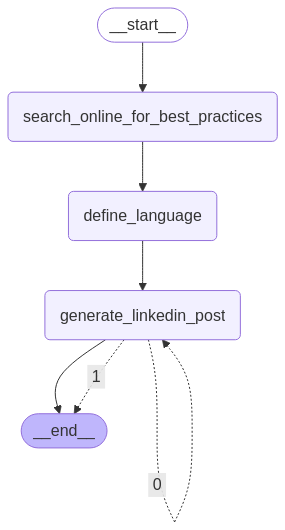

In [28]:
# add node
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("generate_linkedin_post",generate_linkedin_post)
workflow.add_node("search_online_for_best_practices",search_online_for_best_practices)
workflow.add_node("define_language",define_language)

# Add edges

workflow.add_edge(START, "search_online_for_best_practices")

workflow.add_edge("search_online_for_best_practices","define_language")
workflow.add_edge("define_language","generate_linkedin_post")

workflow.add_conditional_edges("generate_linkedin_post", check_linkedin_post_quality, {1:END, 0:"generate_linkedin_post"})
workflow.add_edge("generate_linkedin_post",END)


# Compile 
chain = workflow.compile()

#Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

In [29]:
state = chain.invoke({"transcript":transcript})

In 2025, LinkedIn best practices include authentic, focused storytelling and consistent posting. Use visuals like images and videos to boost engagement. Timing posts during peak hours increases visibility.
The text is in German.
1


In [30]:
print(state["linkedin_post"])

# 🚀 KI und Agentensysteme: Aus einem Video vielfältigen Content generieren! 

Hallo liebe LinkedIn-Community! 📊

Heute möchte ich euch zeigen, wie ihr mit Hilfe von KI und Agentensystemen aus EINEM Video mehrere Content-Formate automatisch erstellen könnt - ich nenne es den "AI Multiplikator" 🔄

In meinem neuesten Video erkläre ich, wie ihr aus euren YouTube-Videos oder anderen Aufnahmen vollautomatisch Content für verschiedene Plattformen wie LinkedIn oder Blogposts generieren könnt.

Der Prozess ist einfach:
1️⃣ Video aufnehmen (mit automatischem Transkript)
2️⃣ Transkript als Input für KI-Modelle nutzen
3️⃣ Plattformspezifischen Content generieren lassen

Besonders für uns Unternehmer und Selbstständige mit knapper Zeit ist diese Methode Gold wert! Ihr behaltet die persönliche Note eures Contents, während die KI die Aufbereitung für verschiedene Plattformen übernimmt.

Im Video zeige ich euch auch, wie ich mit LangChain und Agentenfunktionen einen Post-Generator gebaut habe, der:
- 